In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape=(28, 28)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dense(64, activation='relu'))

In [ ]:
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8732 - loss: 0.4289 - val_accuracy: 0.9618 - val_loss: 0.1253
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9684 - loss: 0.1017 - val_accuracy: 0.9699 - val_loss: 0.0951
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9780 - loss: 0.0725 - val_accuracy: 0.9715 - val_loss: 0.0945
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9832 - loss: 0.0520 - val_accuracy: 0.9729 - val_loss: 0.0860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.9780 - val_loss: 0.0749
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9754 - val_loss: 0.0891
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9915 - loss: 0.0247 - val_accuracy: 0.9788 - val_loss: 0.0763
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9936 - loss: 0.020

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9711 - loss: 0.1216
Test accuracy: 0.97


In [ ]:
predictions = model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [ ]:
print("Predicted classes:", np.argmax(predictions, axis=1))
print("True classes:", np.argmax(y_test[:5], axis=1))


Predicted classes: [7 2 1 0 4]
True classes: [7 2 1 0 4]


In [ ]:

import matplotlib.pyplot as plt
import random


In [ ]:
random_index = random.randint(0, x_test.shape[0] - 1)
random_image = x_test[random_index]
true_label = np.argmax(y_test[random_index])


In [ ]:
prediction = model.predict(random_image.reshape(1, 28, 28))
predicted_label = np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


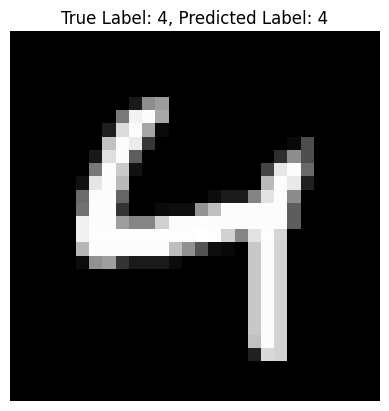

In [ ]:
plt.imshow(random_image, cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
